# Le relazioni tra variabili

# Associazione statistica

In questo capitolo esamineremo il problema di visualizzare e di quantificare una particolare relazione tra due variabili quantitative. Presenteremo prima uno strumento grafico, il diagramma a dispersione, che consente di visualizzare l'associazione tra due variabili quantitative. Considereremo poi la covarianza e la correlazione che consentono di quantificare la forza e la direzione dell'associazione lineare tra due variabili quantitative.

(sec-zetsche-scatter)=
## Diagramma a dispersione

Il diagramma di dispersione è la rappresentazione grafica delle coppie di punti individuati da due variabili $X$ e $Y$. Per fare un esempio concreto, consideriamo nuovamente la ricerca di {cite}`zetsche_2019future`. Questi ricercatori hanno misurato il livello di depressione dei soggetti utilizzando due scale psicometriche: il *Beck Depression Inventory II* (BDI-II) e la *Center for Epidemiologic Studies Depression Scale* (CES-D). Il BDI-II è uno strumento self-report che valutare la presenza e l'intensità di sintomi depressivi in pazienti adulti e adolescenti di almeno 13 anni di età con diagnosi psichiatrica mentre la CES-D è una scala self-report progettata per misurare i sintomi depressivi che sono stati vissuti nella settimana precedente nella popolazione generale, specialmente quella degli adolescenti/giovani adulti. Usiamo questi dati per costruire un diagramma a dispersione. Poniamo, ad esempio, i valori BDI-II sull'asse delle ascisse e quelli del CES-D sull'asse delle ordinate. In tale grafico, cascun punto corrisponde ad un individuo del quale conosciamo il livello di depressione misurato dalle due scale psicometriche.

È chiaro che i valori delle scale BDI-II e CES-D non possono essere identici, e questo per due motivi: (1) la presenza degli errori di misurazione e (2) l'unità di misura delle due variabili. L'errore di misurazione corrompe sempre, almeno in parte, qualunque operazione di misurazione. E questo è vero specialmente in psicologia dove l'*attendibilità* (cioè, la precisione degli strumenti di misurazione è minore che in altre discipline (quali la fisica, ad esempio). Il secondo motivo per cui i valori delle scale BDI-II e CES-D non possono essere uguali è che l'unità di misura delle due scale è arbitraria. Infatti, qual è l'unità di misura della depressione? Chi può dirlo! Ma, al di là delle differenze derivanti dall'errore di misurazione e dalla differente unità di misura, ci aspettiamo che, se le due scale misurano entrambe lo stesso costrutto (la depressione), allora i valori prodotti dalle due scale dovranno essere tra loro *linearmente associati*. Per capire cosa si intende con "associazione lineare" iniziamo a guardare i dati. Per fare questo utilizziamo un diagramma a dispersione.

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from scipy import stats
import arviz as az
RANDOM_SEED = 8927
rng = np.random.default_rng(RANDOM_SEED)
%config InlineBackend.figure_format = 'retina'
az.style.use("arviz-darkgrid")
plt.style.use('tableau-colorblind10')

In [2]:
df = pd.read_csv('data/data.mood.csv',index_col=0)
df = df[['esm_id','group','bdi', 'cesd_sum']]
df = df.drop_duplicates(keep='first')
df = df[pd.notnull(df['bdi'])]

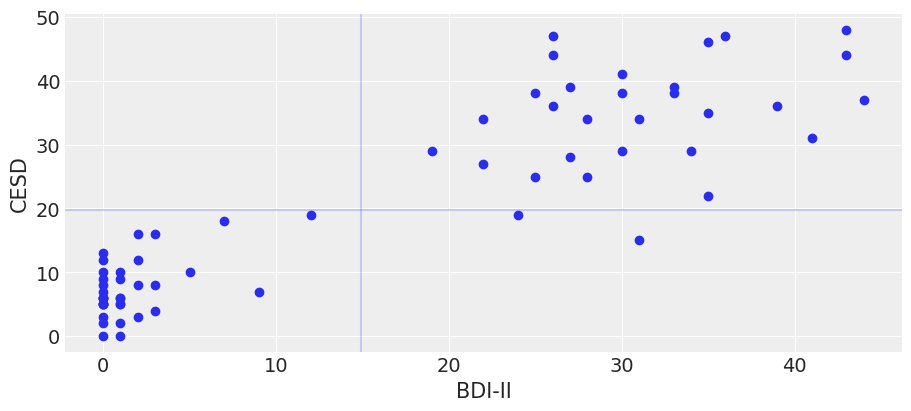

In [3]:
plt.figure(figsize=(9,4))
plt.scatter(df['bdi'], df['cesd_sum'])
plt.rcParams.update({'figure.figsize':(10,10), 'figure.dpi':100})
plt.xlabel('BDI-II')
plt.ylabel('CESD')
plt.axvline(np.mean(df.bdi), alpha=0.2)
plt.axhline(np.mean(df.cesd_sum), alpha=0.2)

Dal diagramma notiamo che i dati mostrano una tendenza a disporsi attorno ad una retta -- nel gergo statistico, questo fatto viene espresso dicendo che i punteggi CES-D tendono ad essere *linearmente associati* ai punteggi BDI-II. È ovvio, tuttavia, che tale relazione lineare è lungi dall'essere perfetta -- se fosse perfetta, tutti i punti del diagramma a dispersione si disporrebbero esattamente lungo una retta. Si pone dunque il problema di trovare un indice numerico che descriva di quanto la nube di punti si discosta da una perfetta relazione lineare tra le due variabili, ovvero che descriva la direzione e la forza della relazione lineare tra le due variabili. Ci sono vari indici statistici che possono essere utilizzati a questo scopo.

## Covarianza

Iniziamo a considerare il più importante di tali indici, chiamato *covarianza*. In realtà la definizione di questo indice non ci sorprenderà più di tanto in quanto, in una forma solo apparentemente diversa, l'abbiamo già incontrata in precedenza. Ci ricordiamo infatti che la varianza di una generica variabile $X$ è definita come la media degli scarti quadratici di ciascuna osservazione dalla media:

$$
S_{XX} = \frac{1}{n} \sum_{i=1}^n(X_i - \bar{X}) (X_i - \bar{X}). 
$$

La varianza viene talvolta descritta come la "covarianza di una variabile con sé stessa". Adesso facciamo un passo ulteriore. Invece di valutare la dispersione di una sola variabile, ci chiediamo come due variabili $X$ e $Y$ "variano insieme" (co-variano). È facile capire come una risposta a tale domanda possa essere fornita da una semplice trasformazione della formula precedente che diventa:

$$
S_{XY} = \frac{1}{n} \sum_{i=1}^n(X_i - \bar{X}) (Y_i - \bar{Y}).
$$ (eq-cov-def)

L'eq. {eq}`eq-cov-def` ci fornisce la definizione della covarianza.

### Interpretazione

Per capire il significato dell'eq. {eq}`eq-cov-def`, supponiamo di dividere il grafico riportato nella sezione {ref}`sec-zetsche-scatter` in quattro quadranti definiti da una retta verticale passante per la media dei valori BDI-II e da una retta orizzontale passante per la media dei valori CES-D. Numeriamo i quadranti partendo da quello in basso a sinistra e muovendoci in senso antiorario.

Se prevalgono punti nel I e III quadrante, allora la nuvola di punti avrà un andamento crescente (per cui a valori bassi di $X$ tendono ad associarsi valori bassi di $Y$ e a valori elevati di $X$ tendono ad associarsi valori elevati di $Y$) e la covarianza avrà segno positivo. Mentre se prevalgono punti nel II e IV quadrante la nuvola di punti avrà un andamento decrescente (per cui a valori bassi di $X$ tendono ad associarsi valori elevati di $Y$ e a valori elevati di $X$ tendono ad associarsi valori bassi di $Y$) e la covarianza avrà segno negativo. Dunque, il segno della covarianza ci informa sulla direzione della relazione lineare tra due variabili: l'associazione lineare si dice positiva se la covarianza è positiva, negativa se la covarianza è negativa.

Se il segno della covarianza ci informa sulla direzione della relazione, il valore assoluto della covarianza ci dice invece ben poco. Esso, infatti, dipende dall'unità di misura delle variabili. Nel caso presente questo concetto è difficile da comprendere, dato che le due variabili in esame hanno un'unità di misura arbitraria e sconosciuta. Ma quest'idea diventa chiara se pensiamo alla relazione lineare tra l'altezza e il peso delle persone, ad esempio. La covarianza tra queste due quantità è certamente positiva, ma il valore assoluto della covarianza diventa più grande se l'altezza viene misurata in millimetri e il peso in grammi, e più piccolo se l'altezza viene misurata in metri e il peso in chilogrammi. Dato che il valore assoluto della covarianza dipende dall'unità di misura delle variabili, abbiamo bisogno di un indice di associazione lineare adimensionale. Questo indice è fornito dalla correlazione.

## Correlazione

È possibile trasformare la covarianza in modo tale da renderla immune alle trasformazioni dell'unità di misura delle variabili. Questa operazione si dice *standardizzazione* e corrisponde alla divisione della covarianza per le deviazioni standard ($s_X$, $s_Y$) delle due variabili:

$$ 
r_{XY} = \frac{S_{XY}}{S_X S_Y}. 
$$ (eq-cor-def)

La quantità che si ottiene in questo modo viene chiamata *correlazione* di Bravais-Pearson (dal nome degli autori che, indipendentemente l'uno dall'altro, l'hanno introdotta).

### Proprietà

Il coefficiente di correlazione ha le seguenti proprietà:

-   ha lo stesso segno della covarianza, dato che si ottiene dividendo la covarianza per due numeri positivi;
-   è un numero puro, cioè non dipende dall'unità di misura delle variabili;
-   assume valori compresi tra -1 e +1.

### Interpretazione  

All'indice di correlazione possiamo assegnare la seguente interpretazione:

1.  $r_{XY} = -1$ $\rightarrow$ perfetta relazione negativa: tutti i punti si trovano esattamente su una retta con pendenza negativa (dal quadrante in alto a sinistra al quadrante in basso a destra);
2.  $r_{XY} = +1$ $\rightarrow$ perfetta relazione positiva: tutti i punti si trovano esattamente su una retta con pendenza positiva (dal quadrante in basso a sinistra al quadrante in alto a destra);
3.  $-1 < r_{XY} < +1$ $\rightarrow$ presenza di una relazione lineare di intensità diversa;
4.  $r_{XY} = 0$ $\rightarrow$ assenza di relazione lineare tra $X$ e $Y$.

Per i dati del diagramma riportato nella sezione {ref}`sec-zetsche-scatter`, la covarianza è 207.426. Il segno positivo della covarianza ci dice che tra le due variabili c'è un'associazione lineare positiva. Per capire quale sia l'intensità della relazione lineare calcoliamo la correlazione. Essendo le deviazioni standard del BDI-II e del CES-D rispettavamente uguali a 15.37 e 14.93, la correlazione diventa uguale a $\frac{207.426}{15.38 \cdot 14.93} = 0.904.$ Tale valore è prossimo a 1.0, il che vuol dire che i punti del diagramma a dispersione non si discostano troppo da una retta con una pendenza positiva.

## Correlazione e causazione

Facendo riferimento nuovamente al diagramma di dispersione della sezione {ref}`sec-zetsche-scatter`, possiamo dire che, in molte applicazioni (ma non nel caso presente!) l'asse $x$ rappresenta una quantità nota come *variabile indipendente* e l'interesse si concentra sulla sua influenza sulla *variabile dipendente* tracciata sull'asse $y$. Ciò presuppone che sia nota la direzione in cui l'influenza causale potrebbe risiedere ($x \rightarrow y$, vs. $y \rightarrow x$).

È importante però tenere bene a mente che la correlazione è soltanto un indice descrittivo della relazione lineare tra due variabili e *in nessun caso* può essere usata per inferire alcunché sulle relazioni *causali* che legano le variabili. È ben nota l'espressione: "correlazione non significa causazione".

## Correlazione e causazione

Facendo riferimento nuovamente al diagramma di dispersione della sezione {ref}`sec-zetsche-scatter`, possiamo dire che, in molte applicazioni (ma non nel caso presente!) l'asse $x$ rappresenta una quantità nota come *variabile indipendente* e l'interesse si concentra sulla sua influenza sulla *variabile dipendente* tracciata sull'asse $y$. Ciò presuppone che sia nota la direzione in cui l'influenza causale potrebbe risiedere ($x \rightarrow y$, vs. $y \rightarrow x$).

È importante però tenere bene a mente che la correlazione è soltanto un indice descrittivo della relazione lineare tra due variabili e *in nessun caso* può essere usata per inferire alcunché sulle relazioni *causali* che legano le variabili. È ben nota l'espressione: "correlazione non significa causazione".

## Usi della correlazione

Anche se non può essere usata per studiare le relazioni causali, la correlazione viene usata per molti altri scopi tra i quali, per esempio, quello di misurare la *validità concorrente* di un test psiologico. Se un test psicologico misura effettivamente ciò che ci si aspetta che misuri (nel caso dell'esempio presente, la depressione), allora dovremo aspettarci che fornisca una correlazione alta con i risultati di altri test che misurano lo stesso costrutto -- come nel caso dei dati di {cite}`zetsche_2019future`. Un'altra proprietà desiderabile di un test psicometrico è la *validità divergente*: i risultati di test psicometrici che misurano costrutti diversi dovrebbero essere poco associati tra loro. In altre parole, in questo secondo caso dovremmo aspettarci una bassa correlazione.

## Correlazione di Spearman

Una misura alternativa della relazione lineare tra due variabili è fornita dal coefficiente di correlazione di Spearman e dipende soltanto dalla relazione d'ordine dei dati, non dagli specifici valori dei dati. Tale misura di associazione è appropriata quando, del fenomeno in esame, gli psicologi sono stati in grado di misurare soltanto le relazioni d'ordine tra le diverse modalità della risposta dei soggetti, non l'intensità della risposta. Le variabili psicologiche che hanno questa proprietà si dicono *ordinali*.

```{admonition} Nota
Si ricordi che, nel caso di una variabile ordinale, non è possibile sintetizzare le osservazioni mediante le statistiche descrittive che abbiamo descritto in precedenza, quali ad esempio la media e la varianza. È invece possibile riassumere le ossservazioni su una variabile ordinale mediante una distribuzione di frequenze per le varie modalità della risposta. Come abbiamo visto or ora, è anche possibile descrivere la direzione e la forza dell'associazione tra due variabili ordinali mediante la correlazione di Spearman.
```

Per fare un esempio, per due variabili arbitrarie di livello ordinale, troviamo la correlazione di Spearman.

In [4]:
stats.spearmanr([1,2,3,4,5], [5,6,7,8,7])

SpearmanrResult(correlation=0.8207826816681233, pvalue=0.08858700531354381)

## Correlazione nulla

Un ultimo aspetto da mettere in evidenza a proposito della correlazione riguarda il fatto che la correlazione descrive la direzione e l'intensità della relazione lineare tra due variabili. Relazioni non lineari tra le variabili, anche se sono molto forti, non vengono catturate dalla correlazione. È importante rendersi conto che una correlazione pari a zero non significa che non c'è relazione tra le due variabili, ma solo che tra esse non c'è una relazione *lineare*.


La figura seguente fornisce tredici esempi di correlazione nulla in presenza di una chiara relazione (non lineare) tra due variabili. In questi tredici insiemi di dati i coefficienti di correlazione di Pearson sono sempre uguali a 0. Ma questo non significa che non vi sia alcuna relazione tra le variabili.

In [5]:
datasaurus_data = pd.read_csv('data/datasaurus.csv')
datasaurus_data.groupby('dataset').agg({'x': ['count','mean', 'std'],'y': ['count','mean', 'std']})

x                           y                      
           count       mean        std count       mean        std
dataset                                                           
away         142  54.266100  16.769825   142  47.834721  26.939743
bullseye     142  54.268730  16.769239   142  47.830823  26.935727
circle       142  54.267320  16.760013   142  47.837717  26.930036
dino         142  54.263273  16.765142   142  47.832253  26.935403
dots         142  54.260303  16.767735   142  47.839829  26.930192
h_lines      142  54.261442  16.765898   142  47.830252  26.939876
high_lines   142  54.268805  16.766704   142  47.835450  26.939998
slant_down   142  54.267849  16.766759   142  47.835896  26.936105
slant_up     142  54.265882  16.768853   142  47.831496  26.938608
star         142  54.267341  16.768959   142  47.839545  26.930275
v_lines      142  54.269927  16.769959   142  47.836988  26.937684
wide_lines   142  54.266916  16.770000   142  47.831602  26.937902
x_shape      142  54.260150  16.769958   142  47.839717  26.930002

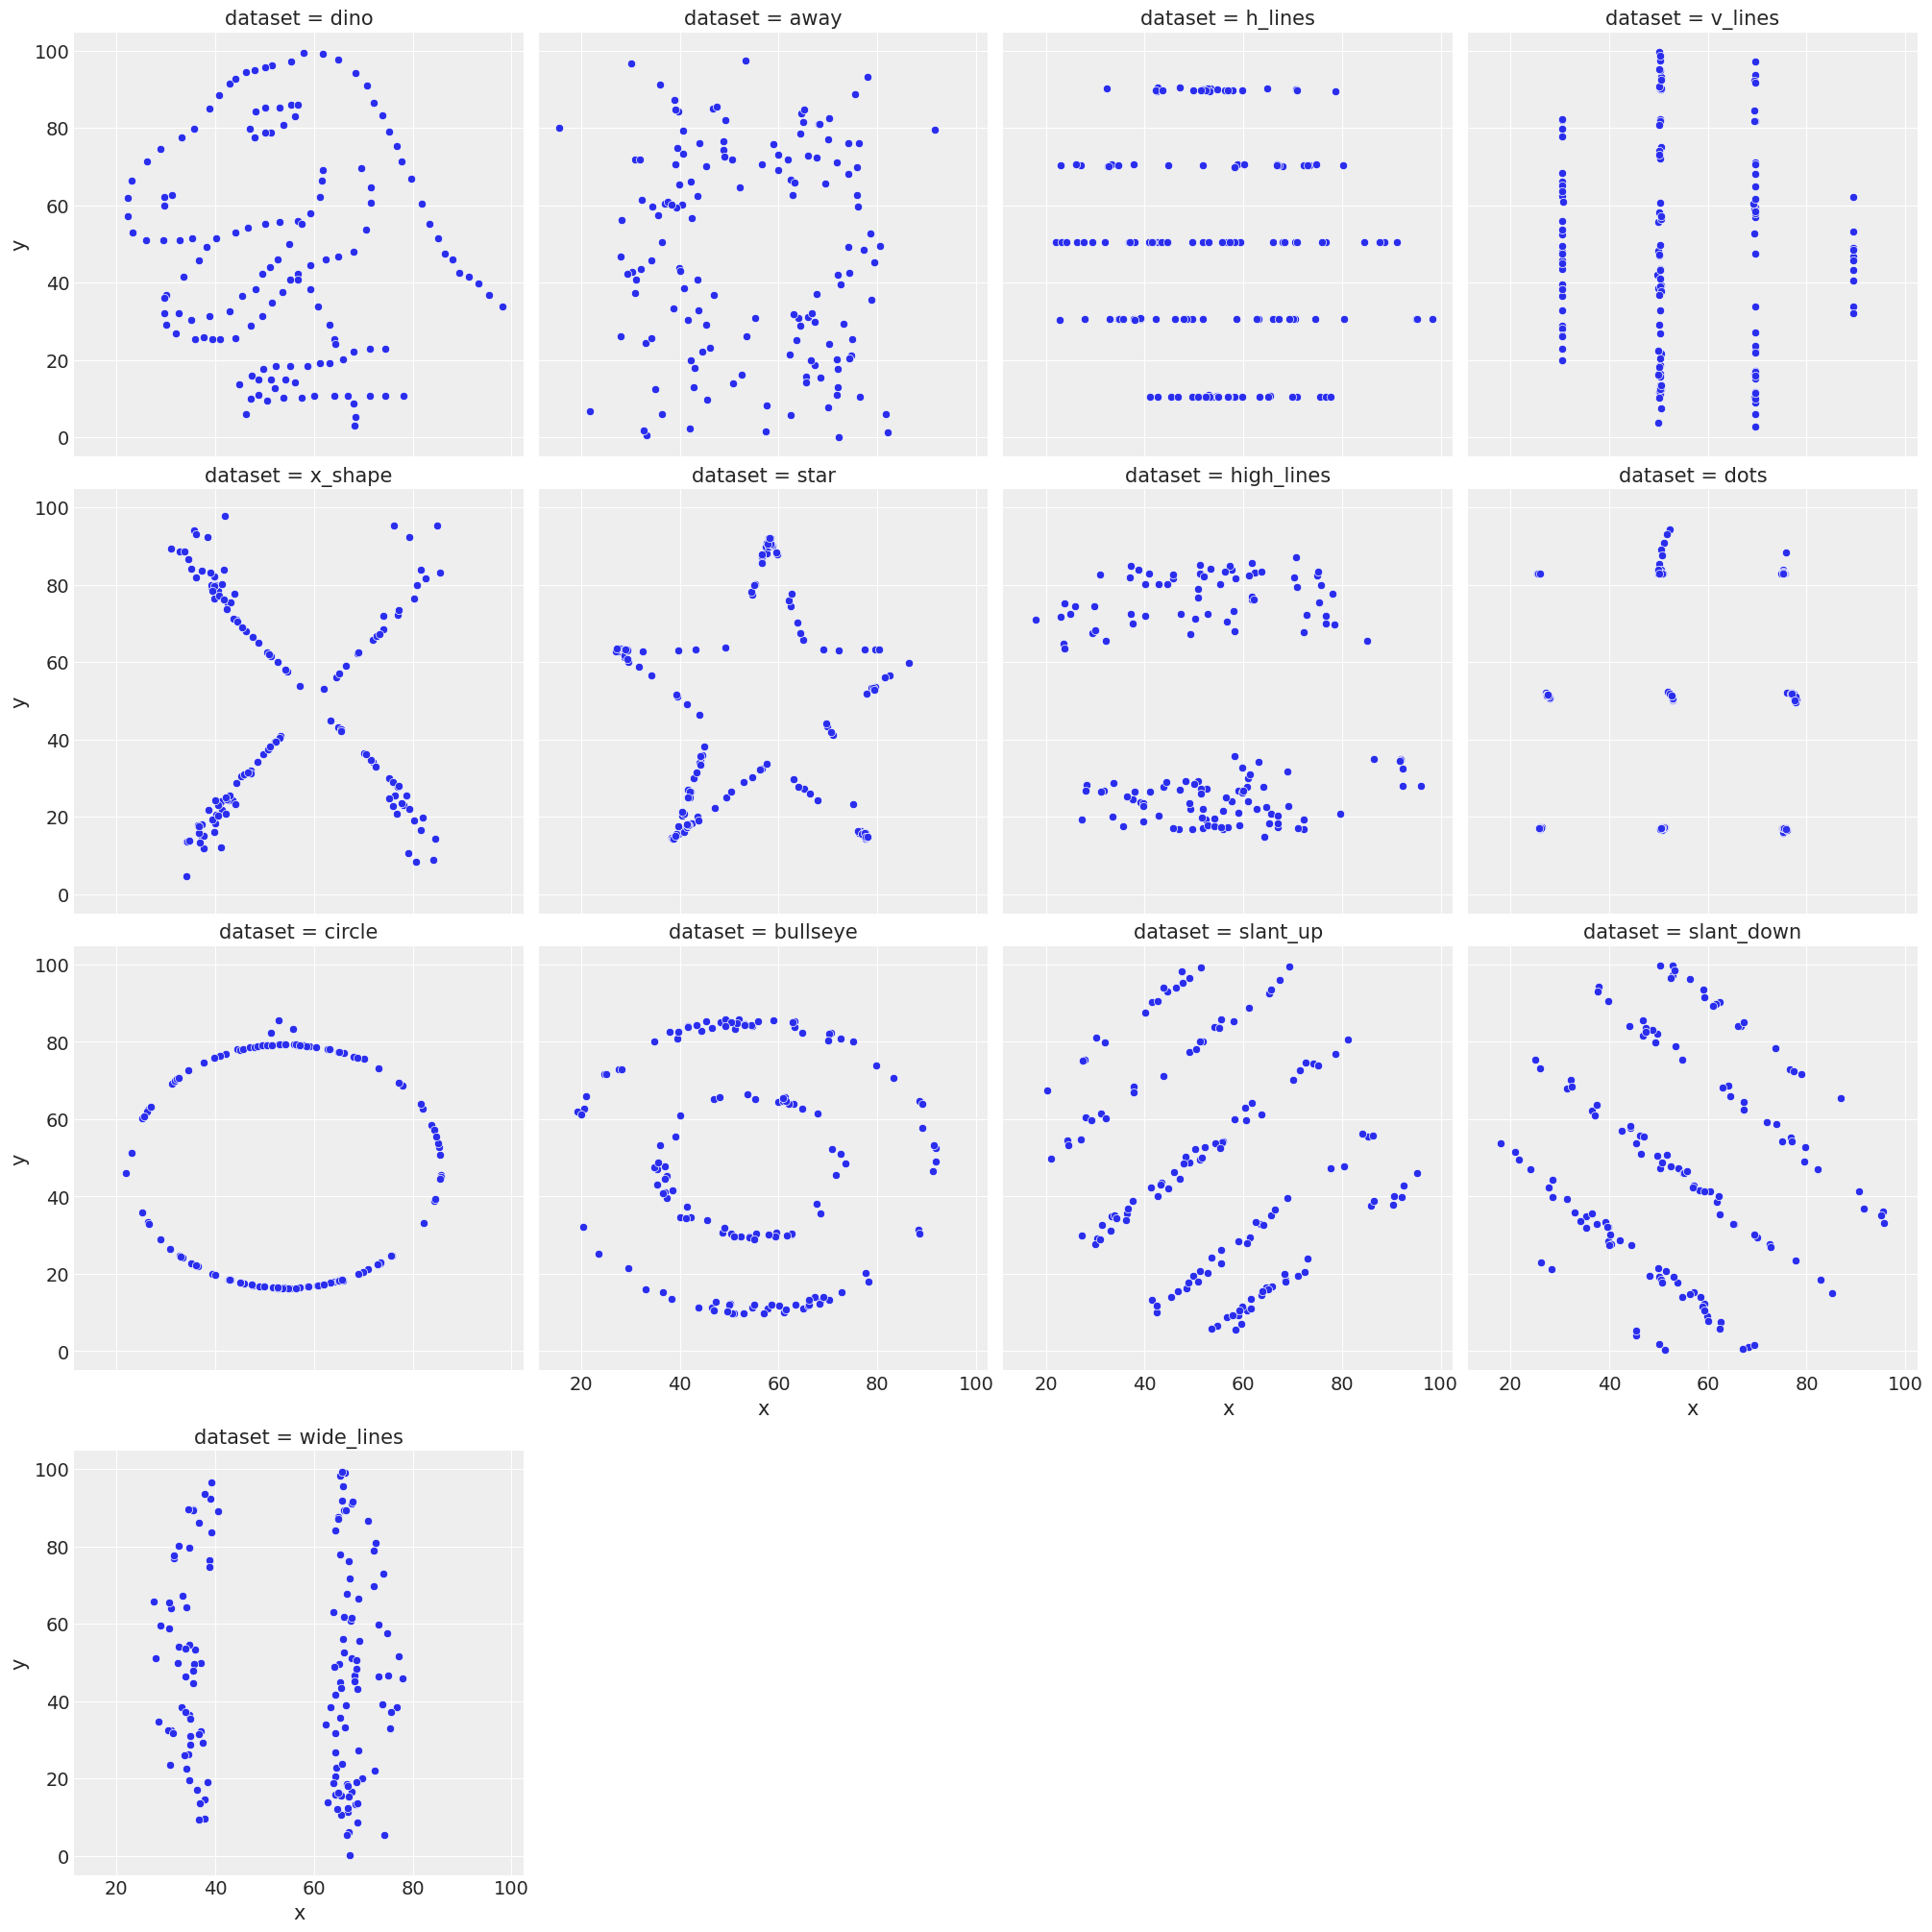

In [6]:
sns.relplot(data=datasaurus_data, x='x', y='y', col='dataset', col_wrap=4)

## Commenti e considerazioni finali

La prima fase dell'analisi dei dati riassume i dati mediante gli strumenti della statistica descrittiva. Le tipiche domande che vengono affrontate in questa fase sono: qual è la distribuzione delle variabili di interesse? Quali relazioni rra coppie di variabili si possono osservare nel campione? Ci sono delle osservazioni 'anomale', ovvero estremamente discrepanti rispetto alle altre, sia quando si esaminano le statistiche descrittive univariate (ovvero, quelle che riguardano le caratteristiche di una variabile presa singolarmente), sia quando vengono esaminate le statistiche bivariate (ovvero, le statistiche che descrivono l'associazione tra le variabili)? È importante avere ben chiare le idee su questi punti prima di procedere con qualsiasi procedura statistica di tipo inferenziale. Per rispondere alle domande che abbiamo elencato sopra, ed ad altre simili, è molto utile procedere con delle rappresentazioni grafiche dei dati.